In [200]:
# 데이터 준비
import pandas as pd
import numpy as np

In [201]:
traincar=pd.read_csv('train_car_price_data.csv')
testcar=pd.read_csv('test_car_price_data.csv')

In [202]:
traincar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [203]:
traincar.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [204]:
train_feature=traincar[['Year','Kilometers_Driven','Mileage','Engine','Power','Price']]
test_feature=testcar[['Year','Kilometers_Driven','Mileage','Engine','Power']]

In [205]:
# oil 관련값만 추출
train_feature_other=train_feature[train_feature['Mileage'].str.find('kmpl')<0]
train_feature_oil=train_feature[train_feature['Mileage'].str.find('kmpl')>=0]

test_feature_other=test_feature[test_feature['Mileage'].str.find('kmpl')<0]
test_feature_oil=test_feature[test_feature['Mileage'].str.find('kmpl')>=0]

len(train_feature_other),len(test_feature_other)
# 66개로.. 8개 밝히긴 불가. .잘가..

(66, 8)

In [206]:
# 단위제거
#train_feature.loc[:,'Mileage']=train_feature.loc[:,'Mileage'].str.replace(' km/kg','')
train_feature_oil.loc[:,'Mileage']=train_feature_oil.loc[:,'Mileage'].str.replace(' kmpl','')
train_feature_oil.loc[:,'Engine']=train_feature_oil.loc[:,'Engine'].str.replace(' CC','')
train_feature_oil.loc[:,'Power']=train_feature_oil.loc[:,'Power'].str.replace(' bhp','')

test_feature_oil.loc[:,'Mileage']=test_feature_oil.loc[:,'Mileage'].str.replace(' kmpl','')
test_feature_oil.loc[:,'Engine']=test_feature_oil.loc[:,'Engine'].str.replace(' CC','')
test_feature_oil.loc[:,'Power']=test_feature_oil.loc[:,'Power'].str.replace(' bhp','')


In [207]:
# 결측값 제거 
train_feature_oil=train_feature_oil.dropna()
train_feature_oil=train_feature_oil[train_feature_oil['Power'].str.find('null')<0]
train_feature_oil.info()

test_feature_oil=test_feature_oil[test_feature_oil['Power'].str.find('null')<0]

<class 'pandas.core.frame.DataFrame'>
Index: 5809 entries, 1 to 6018
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5809 non-null   int64  
 1   Kilometers_Driven  5809 non-null   int64  
 2   Mileage            5809 non-null   object 
 3   Engine             5809 non-null   object 
 4   Power              5809 non-null   object 
 5   Price              5809 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 317.7+ KB


In [208]:
test_feature_oil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, 1 to 1233
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1194 non-null   int64 
 1   Kilometers_Driven  1194 non-null   int64 
 2   Mileage            1194 non-null   object
 3   Engine             1194 non-null   object
 4   Power              1194 non-null   object
dtypes: int64(2), object(3)
memory usage: 56.0+ KB


In [209]:
train_feature_oil.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
1,2015,41000,19.67,1582,126.2,12.50
2,2011,46000,18.2,1199,88.7,4.50
3,2012,87000,20.77,1248,88.76,6.00
4,2013,40670,15.2,1968,140.8,17.74
6,2013,86999,23.08,1461,63.1,3.50


In [210]:
train_feature_oil[['Mileage','Engine','Power']]=train_feature_oil[['Mileage','Engine','Power']].astype('float')
train_feature_oil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5809 entries, 1 to 6018
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5809 non-null   int64  
 1   Kilometers_Driven  5809 non-null   int64  
 2   Mileage            5809 non-null   float64
 3   Engine             5809 non-null   float64
 4   Power              5809 non-null   float64
 5   Price              5809 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 317.7 KB


In [211]:
test_feature_oil[['Mileage','Engine','Power']]=test_feature_oil[['Mileage','Engine','Power']].astype('float')
test_feature_oil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, 1 to 1233
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1194 non-null   int64  
 1   Kilometers_Driven  1194 non-null   int64  
 2   Mileage            1194 non-null   float64
 3   Engine             1194 non-null   float64
 4   Power              1194 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 56.0 KB


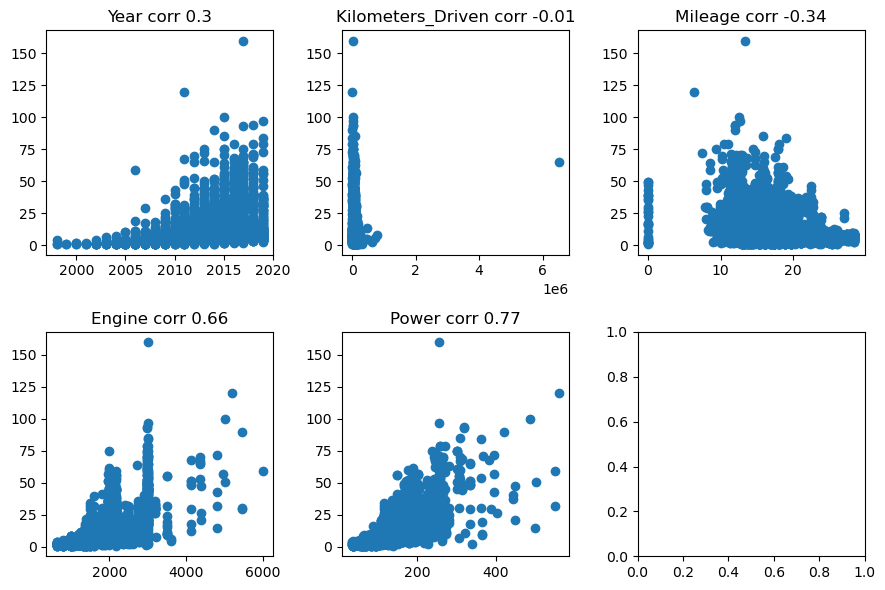

In [212]:
# 상관도 확인
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(2,3)
for i in range(5):
    x=i//3
    y=i%3
    ax[x,y].scatter(train_feature_oil[train_feature_oil.columns[i]],train_feature_oil['Price'])
    ax[x,y].set_title(f'{train_feature_oil.columns[i]} corr {round(np.corrcoef(train_feature_oil[train_feature_oil.columns[i]],train_feature_oil["Price"])[0,1],2)}')
plt.tight_layout()
plt.show()

In [213]:
train_feature_oil['Kilometers_Driven'].max()

6500000

In [214]:
# kilometers_Driven 이상치 제거
for i in train_feature_oil.index:
    if train_feature_oil['Kilometers_Driven'][i]==train_feature_oil['Kilometers_Driven'].max():
        print(i)

2328


In [215]:
train_feature_oil.drop(index=2328,inplace=True)

In [216]:
# Price 이상치제거
for i in train_feature_oil['Price'].index:
    if train_feature_oil.loc[i,'Price']== train_feature_oil['Price'].max():
        print(i)

4079


In [217]:
train_feature_oil.drop(index=4079,inplace=True)

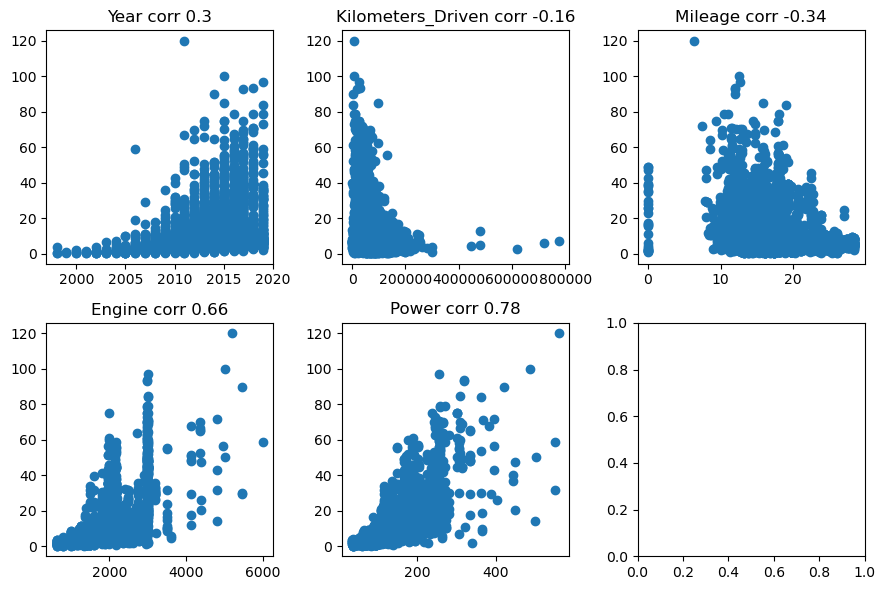

In [218]:
# 상관도 확인
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(2,3)
for i in range(5):
    x=i//3
    y=i%3
    ax[x,y].scatter(train_feature_oil[train_feature_oil.columns[i]],train_feature_oil['Price'])
    ax[x,y].set_title(f'{train_feature_oil.columns[i]} corr {round(np.corrcoef(train_feature_oil[train_feature_oil.columns[i]],train_feature_oil["Price"])[0,1],2)}')
plt.tight_layout()
plt.show()

In [219]:
train_target=train_feature_oil['Price']
train_feature_oil.drop(columns='Price',inplace=True)

In [220]:
# 상관도가 높은 엔진과 파워만 쓰기로 결정!
train_feature_oil=train_feature_oil[['Engine','Power']]
test_feature_oil=test_feature_oil[['Engine','Power']]

In [221]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [222]:
scaler.fit(train_feature_oil)

MinMaxScaler()

In [223]:
train_feature_oil_scaled=scaler.transform(train_feature_oil)
test_feature_oil_scaled=scaler.transform(test_feature_oil)

In [224]:
# 모델 인스턴스 생성
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [225]:
# 모델학습
model.fit(train_feature_oil_scaled,train_target)

LinearRegression()

In [226]:
test_feature_oil['Price']=model.predict(test_feature_oil_scaled)

In [227]:
test_feature_oil

,Engine,Power,Price
1,796.0,47.30,-0.869889
2,2393.0,147.80,14.733377
4,1197.0,82.85,4.786727
5,2179.0,140.00,13.597786
6,2982.0,168.70,17.763126
...,...,...,...
1229,1598.0,103.60,7.948617
1230,1197.0,103.60,8.284401
1231,1461.0,63.10,1.236550
1232,1197.0,103.60,8.284401


In [228]:
test_feature_oil['Price'].max()

90.63568366922314

In [229]:
test_feature_oil['Price'].min()

-3.0780597163481405

In [230]:
test_feature_oil['Price'].var()

68.97148295892207

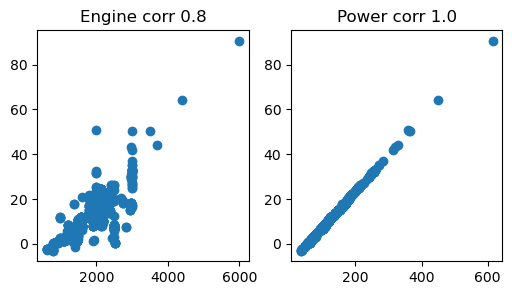

In [231]:
fig=plt.figure(figsize=(6,3))
ax=fig.subplots(1,2)
for i in range(2):
    ax[i].scatter(test_feature_oil[test_feature_oil.columns[i]],test_feature_oil['Price'])
    corr=round(np.corrcoef(test_feature_oil[test_feature_oil.columns[i]],test_feature_oil['Price'])[0,1],2)
    ax[i].set_title(f'{test_feature_oil.columns[i]} corr {corr}')
plt.show()

In [232]:
np.corrcoef(test_feature_oil['Power'],test_feature_oil['Price'])

array([[1.        , 0.99947505],
       [0.99947505, 1.        ]])